<a href="https://colab.research.google.com/github/AnastasiyaPunko/Systems-biology/blob/main/HW2_PunkoAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enrichment analysis**

**Идея ORA**

<br>
На входе: <br>
-набор генов, которые являются дифференциально экспрессированными<br>
-группы генов, которые функционально взаимосвязаны (GO, MSigDB ...)<br>


Мы берем один какой-то джинсет из нашего набора (MSigDB), например, берем все гены, которые учавствуют в пасвее TOR -> зафиксировали -> теперь мы смотрим на все гены, которые мы меряем в нашем эксперименте, мы можем их поделить на две группы: 1)входят ли эти гены в список дифф.экспрессированных, 2) входят ли гены в текущий пасвей -> получаем табличку 2х2.<br>

И наша задача проверить, отличаются ли эти пропорции. Мы ожидаем, что если текущий джинсет не обогащен интересующими нас генами и дифф.экспрессироваными, то эта пропорция будет примерно одна и та же, а проверить  наличие и значимость обогащения нужно с помощью статистических тестов.<br>


На выходе:<br>
Если пасвей обогощен, то большая вероятность того, что он принимает участие в том биологическом процессе, который мы изучаем.

------------------------------------------
**Данные по экспрессии – expr.tsv** <br>
**Информация о генах – genes.tsv** <br>
**Информация об образцах** *(к какому классу (норма/опухоль) относится образец)* **– anno.tsv** <br>

----------------------------------

In [1]:
import pandas as pd

expr = pd.read_csv("expr.tsv", sep="\t")
genes = pd.read_csv("genes.tsv", sep="\t")
anno = pd.read_csv("anno.tsv", sep="\t")

In [2]:
expr.head(5)

,GSM588828,GSM588829,GSM588830,GSM588831,GSM588832,GSM588833,GSM588834,GSM588835,GSM588836,GSM588837,...,GSM588877,GSM588878,GSM588879,GSM588880,GSM588881,GSM588882,GSM588883,GSM588884,GSM588885,GSM588886
0,4.460010,4.648524,4.413816,4.685967,4.381184,4.529176,5.157420,4.768025,4.924071,4.616652,...,3.870638,4.540533,4.309905,4.519285,4.427059,4.587475,4.498123,4.281139,4.498443,4.228814
1,7.239673,6.078186,7.491606,5.607822,5.219378,8.120692,7.423709,7.253842,2.194281,8.000416,...,8.519612,7.397365,6.637553,7.680953,5.821583,7.955098,6.002558,7.053275,7.511692,8.109734
2,5.773474,5.152932,6.361190,6.983381,6.177653,6.219383,5.969231,5.257333,6.108354,5.762013,...,4.394201,4.487075,5.514207,5.681542,5.054774,4.673883,4.518913,4.425299,4.200812,4.001112
3,3.381162,2.053912,4.077756,3.364485,2.944288,3.774973,4.272563,3.659173,4.420119,3.706816,...,3.200994,3.599084,4.684521,3.937642,5.984184,4.305265,5.793236,3.611910,4.158352,3.779648
4,3.958687,3.596518,2.924279,1.317895,3.997508,2.589419,4.653561,3.411456,4.705616,4.413134,...,3.735891,3.091286,4.757382,4.752151,4.520755,1.338718,3.762129,3.974924,4.091977,3.096955


In [3]:
genes.head(5)

,Species Scientific Name,Gene Title,Gene Symbol,ENTREZ_GENE_ID
0,Homo sapiens,alpha-1-B glycoprotein,A1BG,1
1,Homo sapiens,N-acetyltransferase 2 (arylamine N-acetyltrans...,NAT2,10
2,Homo sapiens,adenosine deaminase,ADA,100
3,Homo sapiens,"cadherin 2, type 1, N-cadherin (neuronal)",CDH2,1000
4,Homo sapiens,v-akt murine thymoma viral oncogene homolog 3,AKT3,10000


In [4]:
anno.head(5)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,contact_department,contact_institute,contact_address,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,gender:ch1
0,CC2,GSM588828,Public on Aug 31 2010,Aug 30 2010,Aug 30 2010,RNA,1,colon tumour,Homo sapiens,gender: Male,...,HUMAN CANCER GENOMIC,KING FAISAL SPECIALIST HOSPITAL & RESEARCH CENTER,"MBC 98-16, PO BOX 3354",RIYADH 11211,KSA,11211,Saudi Arabia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM588n...,54675,Male
1,CC3,GSM588829,Public on Aug 31 2010,Aug 30 2010,Aug 30 2010,RNA,1,colon tumour,Homo sapiens,gender: Male,...,HUMAN CANCER GENOMIC,KING FAISAL SPECIALIST HOSPITAL & RESEARCH CENTER,"MBC 98-16, PO BOX 3354",RIYADH 11211,KSA,11211,Saudi Arabia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM588n...,54675,Male
2,CC6,GSM588830,Public on Aug 31 2010,Aug 30 2010,Aug 30 2010,RNA,1,colon tumour,Homo sapiens,gender: Male,...,HUMAN CANCER GENOMIC,KING FAISAL SPECIALIST HOSPITAL & RESEARCH CENTER,"MBC 98-16, PO BOX 3354",RIYADH 11211,KSA,11211,Saudi Arabia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM588n...,54675,Male
3,CC8,GSM588831,Public on Aug 31 2010,Aug 30 2010,Aug 30 2010,RNA,1,colon tumour,Homo sapiens,gender: Male,...,HUMAN CANCER GENOMIC,KING FAISAL SPECIALIST HOSPITAL & RESEARCH CENTER,"MBC 98-16, PO BOX 3354",RIYADH 11211,KSA,11211,Saudi Arabia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM588n...,54675,Male
4,CC11,GSM588832,Public on Aug 31 2010,Aug 30 2010,Aug 30 2010,RNA,1,colon tumour,Homo sapiens,gender: Female,...,HUMAN CANCER GENOMIC,KING FAISAL SPECIALIST HOSPITAL & RESEARCH CENTER,"MBC 98-16, PO BOX 3354",RIYADH 11211,KSA,11211,Saudi Arabia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM588n...,54675,Female


Задача: <br>
Реализовать энричмент самостоятельно – через анализ таблиц сопряженности.
<br>
1) экспрессия скольких генов статистически достоверно различается между раком и нормой? <br>
2) получите состав пасвеев (KEGG, GO, WikiPAthways, ...) используя, например, ресурс MSigDB или любым другим способом. <br>
3) сравните с результатами, которые выдаст WebGestaldt или аналогичный софт.

**1) Определим группу генов, которые являются дифференциально эксперссированными (Ген называется дифференциально экспрессированным, если наблюдаемая разница в изменении количества прочтений (РНК) или уровней экспрессии между двумя экспериментальными условиями является статистически значимой).**



**Проверка статистической значимости проводится с помощью теста Манна-Уитни и с поправкой на множественную проверку гипотез Бенджамини-Хохберга. Порог для p-value – 0.05**

In [5]:
normal = expr[anno["geo_accession"][anno["source_name_ch1"] == "normal paired tissue"]]
tumor = expr[anno["geo_accession"][anno["source_name_ch1"] == "colon tumour"]]

In [6]:
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

p = []
for i in range(expr.shape[0]):
    p.append(stats.mannwhitneyu(normal.iloc[i, :],
                                    expr.iloc[i, :]).pvalue)

pv = multipletests(p, method="fdr_bh")[1]

print(f'Экспрессия {np.sum(pv < 0.05)} генов статистически достоверно различается между раком и нормой')

Экспрессия 6664 генов статистически достоверно различается между раком и нормой


**2)  Получим состав пасвеев (KEGG, GO, WikiPAthways, ...) используя ресурс MSigDB.**<br>
**MSigDB – база данных, из которой мы берем набор функционально взаимосвязанных генов. Отсюда мы берем уже существующее знание о взаимосвязи генов между собой, т.е. это наборы джинсетов.**


**Для проверки того, что дифференциально экспрессируемые гены представлены в определенном пасвее применим тест Фишера. Поправка на множественную проверку гипотез Бенджамини-Хохберга. Порог для p-value – 0.05**

In [8]:
genes_under_study = genes["ENTREZ_GENE_ID"][pv < 0.05].apply(str)
background_genes = genes["ENTREZ_GENE_ID"][pv >= 0.05].apply(str)

In [22]:
from scipy.stats import fisher_exact

#KEGG
kegg_pw = {}
for line in open("c2.cp.kegg.v7.5.entrez.gmt.txt"):
    parts = line.strip().split("\t")
    name, desc, genes_lst = parts[0], parts[1], parts[2:]
    kegg_pw[name] = set(genes_lst)

pw_pv = []
pw = []
for pathw, pw_genes in kegg_pw.items():
    background_genes_in = 0
    background_genes_out = 0
    genes_under_study_in = 0
    genes_under_study_out = 0
    for gene in background_genes:
        if gene in pw_genes:
            background_genes_in += 1
        else:
            background_genes_out += 1
    for gene in genes_under_study:
        if gene in pw_genes:
            genes_under_study_in += 1
        else:
            genes_under_study_out += 1
    table = np.array([[genes_under_study_in, background_genes_in], [genes_under_study_out, background_genes_out]])
    pw_pv.append(fisher_exact(table, "greater")[1])
    pw.append(pathw)

np.array(pw)[multipletests(pw_pv, method="fdr_bh")[1] < 0.05]

array(['KEGG_AMINOACYL_TRNA_BIOSYNTHESIS',
       'KEGG_PENTOSE_PHOSPHATE_PATHWAY', 'KEGG_STEROID_BIOSYNTHESIS',
       'KEGG_PURINE_METABOLISM', 'KEGG_PYRIMIDINE_METABOLISM',
       'KEGG_RIBOSOME', 'KEGG_RNA_DEGRADATION', 'KEGG_RNA_POLYMERASE',
       'KEGG_DNA_REPLICATION', 'KEGG_SPLICEOSOME', 'KEGG_PROTEASOME',
       'KEGG_BASE_EXCISION_REPAIR', 'KEGG_NUCLEOTIDE_EXCISION_REPAIR',
       'KEGG_HOMOLOGOUS_RECOMBINATION', 'KEGG_ERBB_SIGNALING_PATHWAY',
       'KEGG_CELL_CYCLE', 'KEGG_NEUROTROPHIN_SIGNALING_PATHWAY',
       'KEGG_PROGESTERONE_MEDIATED_OOCYTE_MATURATION',
       'KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER_PYLORI_INFECTION',
       'KEGG_PANCREATIC_CANCER', 'KEGG_GLIOMA',
       'KEGG_CHRONIC_MYELOID_LEUKEMIA', 'KEGG_ACUTE_MYELOID_LEUKEMIA'],
      dtype='<U63')

In [17]:
#GO
go_pw = {}
for line in open("c5.go.bp.v7.5.entrez.gmt.txt"):
    parts = line.strip().split("\t")
    name, desc, genes_lst = parts[0], parts[1], parts[2:]
    go_pw[name] = set(genes_lst)

pw_pv = []
pw = []
for pathw, pw_genes in go_pw.items():
    background_genes_in = 0
    background_genes_out = 0
    genes_under_study_in = 0
    genes_under_study_out = 0
    for gene in background_genes:
        if gene in pw_genes:
            background_genes_in += 1
        else:
            background_genes_out += 1
    for gene in genes_under_study:
        if gene in pw_genes:
            genes_under_study_in += 1
        else:
            genes_under_study_out += 1
    table = np.array([[genes_under_study_in, background_genes_in], [genes_under_study_out, background_genes_out]])
    pw_pv.append(fisher_exact(table, "greater")[1])
    pw.append(pathw)

np.array(pw)[multipletests(pw_pv, method="fdr_bh")[1] < 0.05]

array(['GOBP_RIBOSOMAL_LARGE_SUBUNIT_ASSEMBLY',
       'GOBP_MITOTIC_SISTER_CHROMATID_SEGREGATION',
       'GOBP_CELL_CYCLE_CHECKPOINT_SIGNALING', 'GOBP_RRNA_MODIFICATION',
       'GOBP_MICROTUBULE_CYTOSKELETON_ORGANIZATION',
       'GOBP_MITOTIC_CELL_CYCLE',
       'GOBP_RNA_SPLICING_VIA_TRANSESTERIFICATION_REACTIONS',
       'GOBP_SPLICEOSOMAL_SNRNP_ASSEMBLY',
       'GOBP_ENDONUCLEOLYTIC_CLEAVAGE_IN_ITS1_TO_SEPARATE_SSU_RRNA_FROM_5_8S_RRNA_AND_LSU_RRNA_FROM_TRICISTRONIC_RRNA_TRANSCRIPT_SSU_RRNA_5_8S_RRNA_LSU_RRNA',
       'GOBP_MATURATION_OF_5_8S_RRNA',
       'GOBP_MATURATION_OF_SSU_RRNA_FROM_TRICISTRONIC_RRNA_TRANSCRIPT_SSU_RRNA_5_8S_RRNA_LSU_RRNA',
       'GOBP_MATURATION_OF_LSU_RRNA_FROM_TRICISTRONIC_RRNA_TRANSCRIPT_SSU_RRNA_5_8S_RRNA_LSU_RRNA',
       'GOBP_MATURATION_OF_5_8S_RRNA_FROM_TRICISTRONIC_RRNA_TRANSCRIPT_SSU_RRNA_5_8S_RRNA_LSU_RRNA',
       'GOBP_CLEAVAGE_INVOLVED_IN_RRNA_PROCESSING',
       'GOBP_MATURATION_OF_LSU_RRNA',
       'GOBP_ENDONUCLEOLYTIC_CLEAVAGE_INVOLVED

In [18]:
#WikiPAthways
wikipathways_pw = {}
for line in open("c2.cp.wikipathways.v7.5.entrez.gmt.txt"):
    parts = line.strip().split("\t")
    name, desc, genes_lst = parts[0], parts[1], parts[2:]
    wikipathways_pw[name] = set(genes_lst)

pw_pv = []
pw = []
for pathw, pw_genes in wikipathways_pw.items():
    background_genes_in = 0
    background_genes_out = 0
    genes_under_study_in = 0
    genes_under_study_out = 0
    for gene in background_genes:
        if gene in pw_genes:
            background_genes_in += 1
        else:
            background_genes_out += 1
    for gene in genes_under_study:
        if gene in pw_genes:
            genes_under_study_in += 1
        else:
            genes_under_study_out += 1
    table = np.array([[genes_under_study_in, background_genes_in], [genes_under_study_out, background_genes_out]])
    pw_pv.append(fisher_exact(table, "greater")[1])
    pw.append(pathw)

np.array(pw)[multipletests(pw_pv, method="fdr_bh")[1] < 0.05]

array(['WP_TRANSLATION_FACTORS', 'WP_CORI_CYCLE', 'WP_PDGFRBETA_PATHWAY',
       'WP_IL9_SIGNALING_PATHWAY', 'WP_PDGF_PATHWAY',
       'WP_MET_IN_TYPE_1_PAPILLARY_RENAL_CELL_CARCINOMA',
       'WP_NUCLEOTIDE_EXCISION_REPAIR_IN_XERODERMA_PIGMENTOSUM',
       'WP_ONCOSTATIN_M_SIGNALING_PATHWAY',
       'WP_TRANSLATION_INHIBITORS_IN_CHRONICALLY_ACTIVATED_PDGFRA_CELLS',
       'WP_METABOLIC_REPROGRAMMING_IN_COLON_CANCER',
       'WP_EUKARYOTIC_TRANSCRIPTION_INITIATION',
       'WP_G1_TO_S_CELL_CYCLE_CONTROL', 'WP_PROTEASOME_DEGRADATION',
       'WP_CLEAR_CELL_RENAL_CELL_CARCINOMA_PATHWAYS',
       'WP_DNA_REPLICATION', 'WP_AEROBIC_GLYCOLYSIS',
       'WP_BREAST_CANCER_PATHWAY', 'WP_BASE_EXCISION_REPAIR',
       'WP_RETINOBLASTOMA_GENE_IN_CANCER',
       'WP_PROLACTIN_SIGNALING_PATHWAY',
       'WP_DNA_IRDOUBLE_STRAND_BREAKS_AND_CELLULAR_RESPONSE_VIA_ATM',
       'WP_BDNFTRKB_SIGNALING', 'WP_CELL_CYCLE',
       'WP_GLIOBLASTOMA_SIGNALING_PATHWAYS', 'WP_IL5_SIGNALING_PATHWAY',
       'WP_PYR

**3) Cравним с результатами, которые выдаст WebGestaldt.** <br>
**Для проведение ORA в WebGestaldt использовалаcь база данных KEGG. Поправка на множественную проверку гипотез Бенджамини-Хохберга. Порог для p-value – 0.05**

In [134]:
myfile = genes_under_study.tolist()
with open('genes_under_study.txt', 'w') as f:
     print(myfile, file=f)

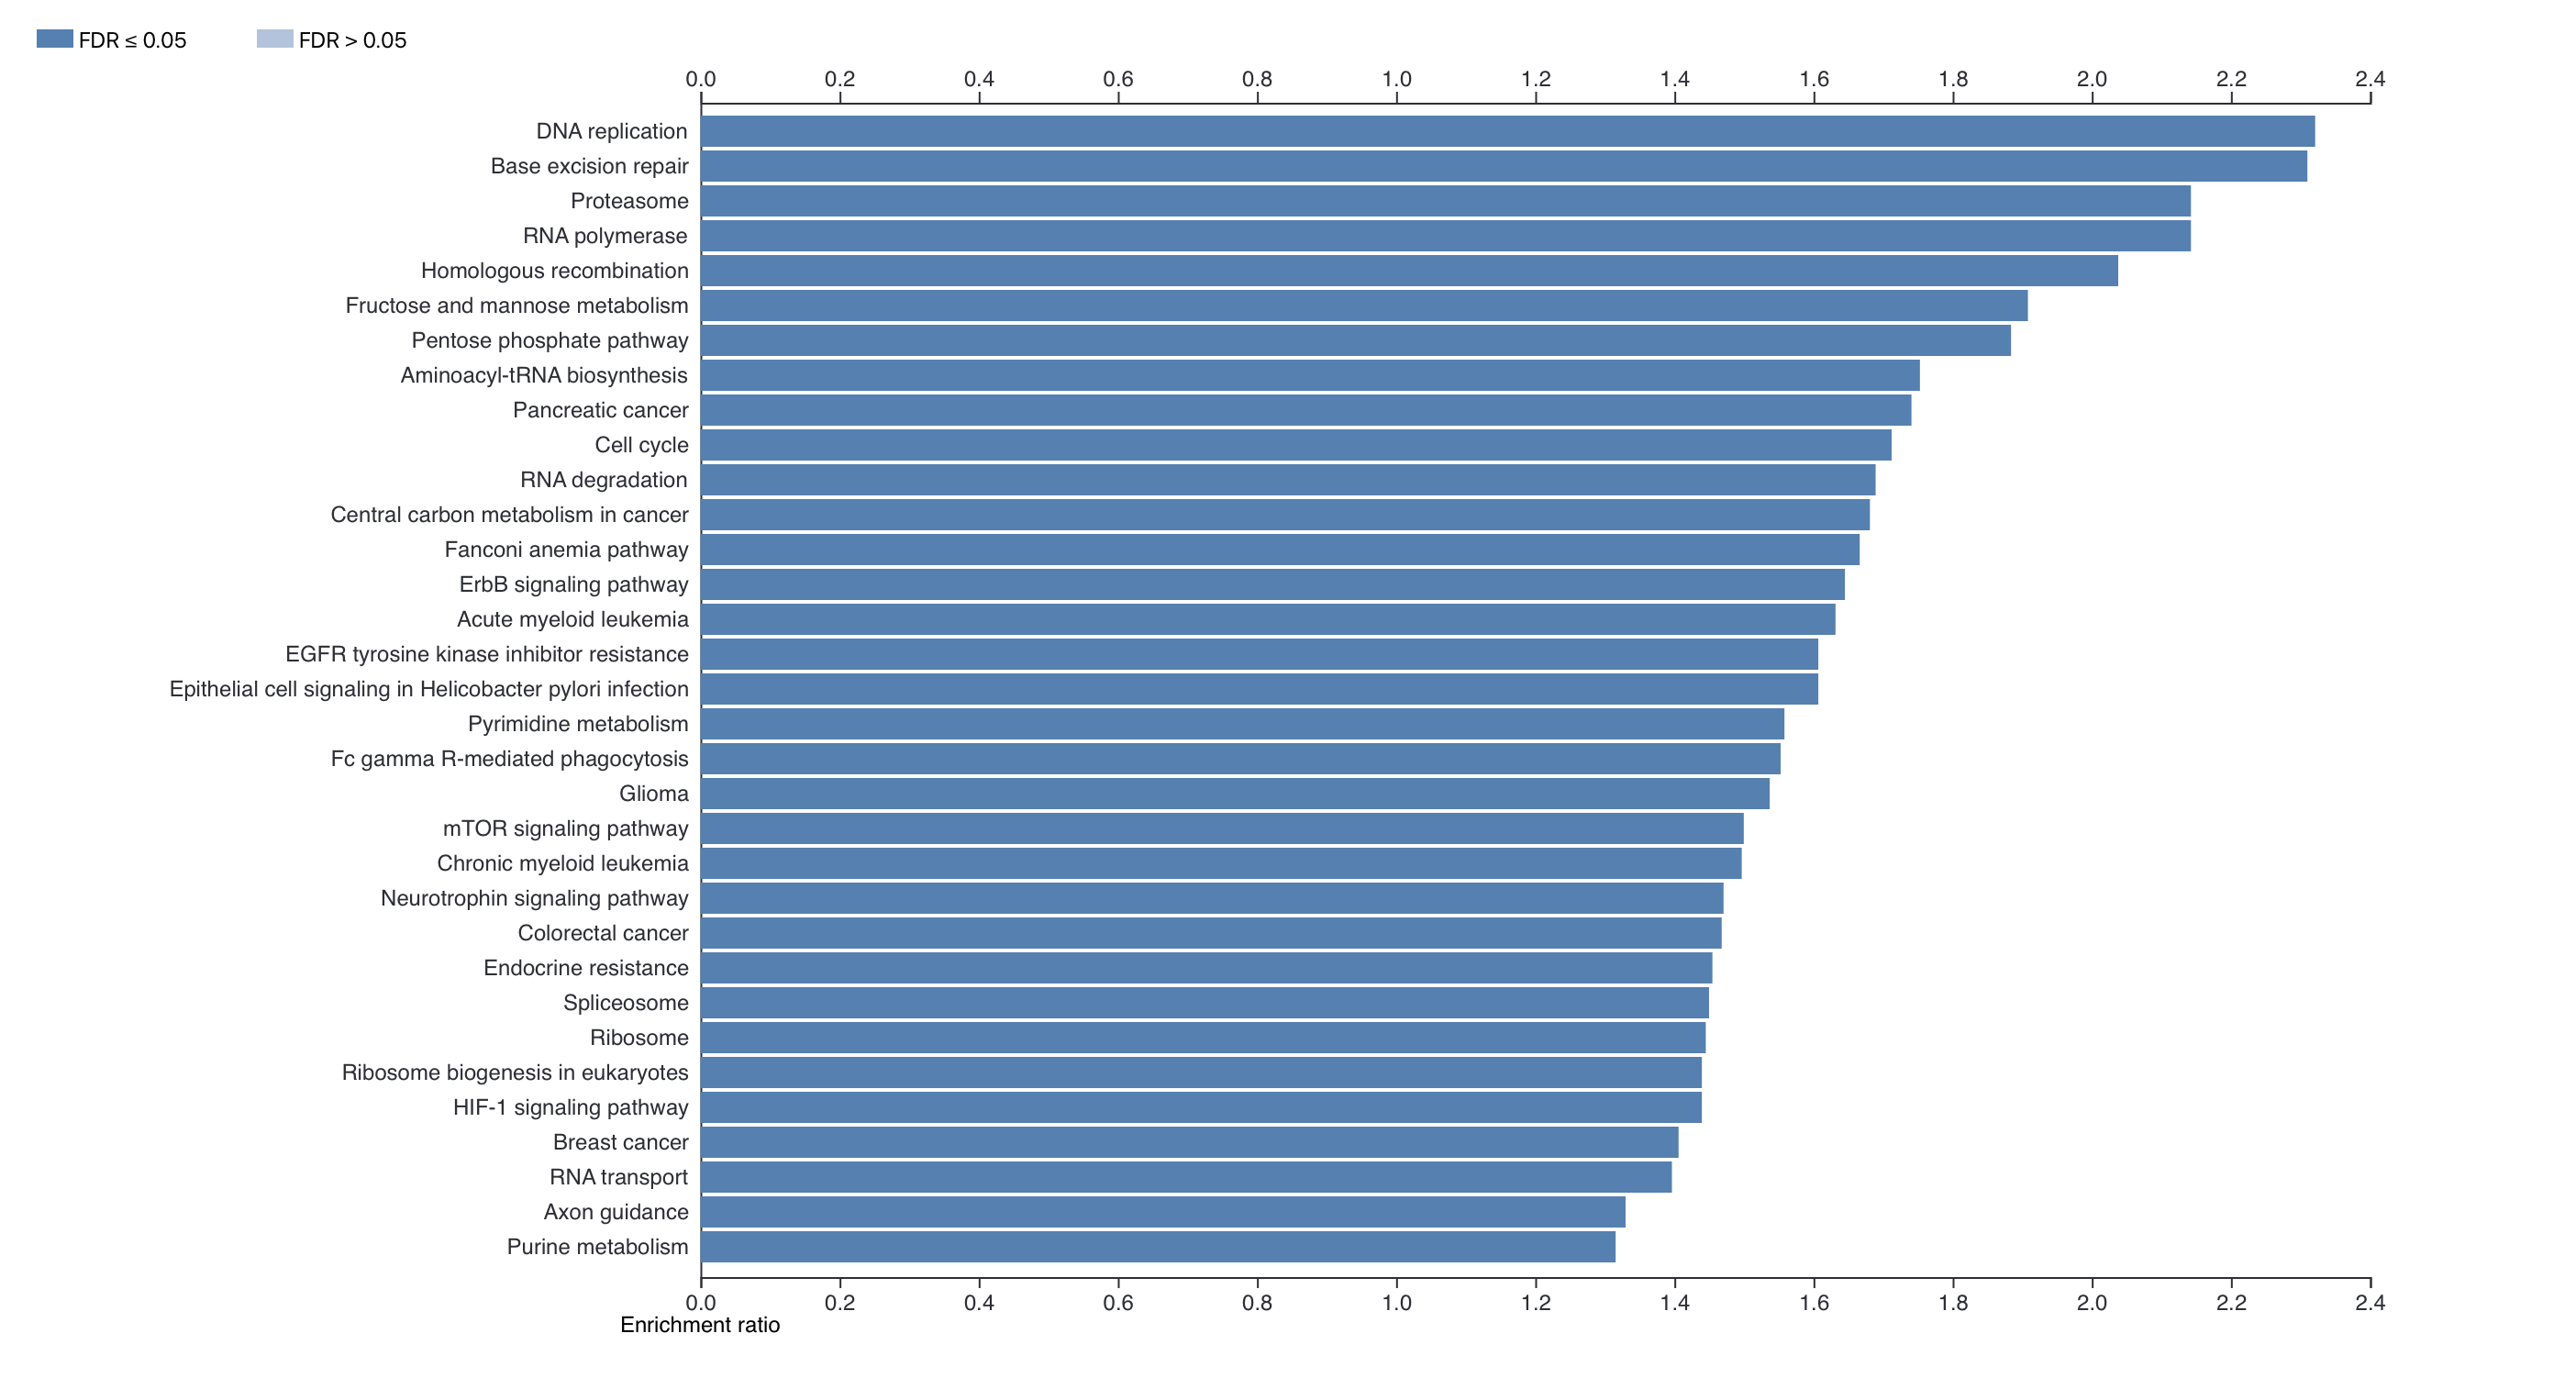

**Сравнение полученных результатов (база KEGG) с результатами WebGestaldt. Многие пасвеи совпадают, но в WebGestaldt получилось больше.**

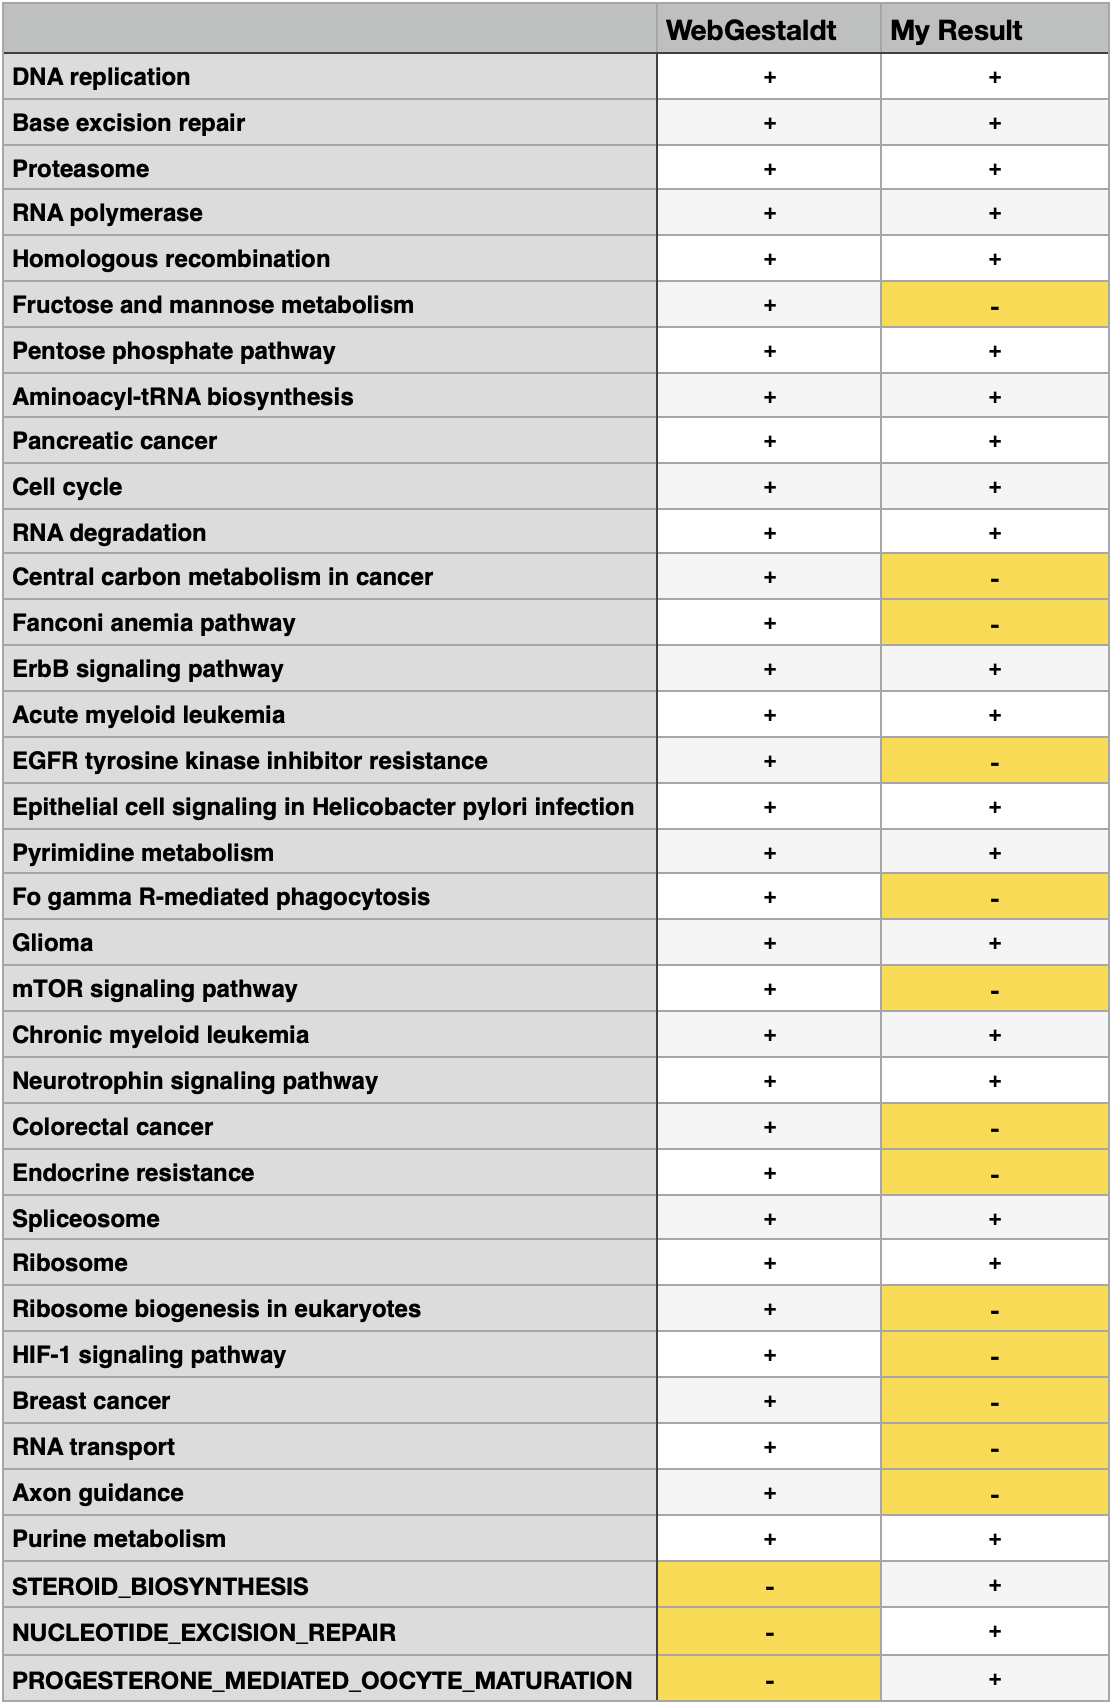